### Problem 4 a)

Create a Robotarium simulation of the system $x^\prime = -L^2 x$ where $L$ is the connected, undirected network graph for some network of your choosing with $N \geq 5$ agents. (Recall HW2, Problem 3)

Let's use undirected cycle graph as an example. When using $L^2$ as the system dynamics, we are driving each agent according to its first-order and second-order connectivity, which looks like the following graph when $N = 12$: 

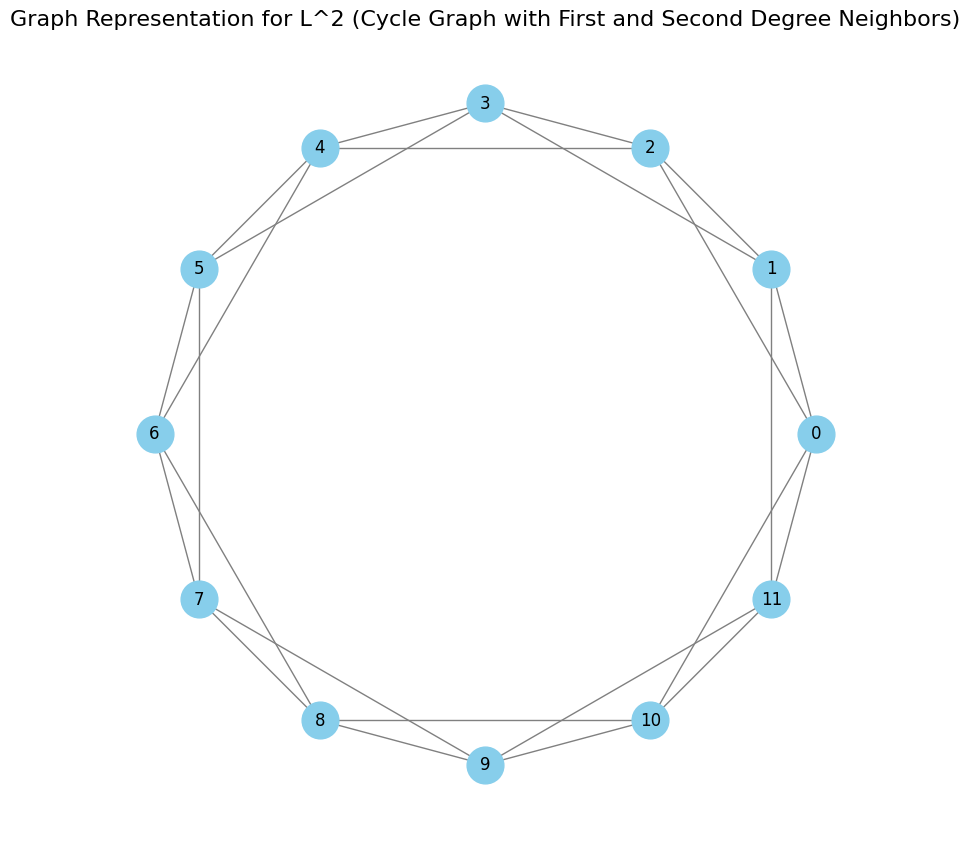

In [15]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def create_cycle_graph_laplacian(N):
    """
    Create the Laplacian matrix for a cycle graph with N nodes.
    """
    L = 2 * np.eye(N)  # Degree on the diagonal
    for i in range(N):
        L[i, (i - 1) % N] = -1  # Previous neighbor
        L[i, (i + 1) % N] = -1  # Next neighbor
    return L

def plot_graph(L_squared, title):
    """
    Plot the graph corresponding to a Laplacian matrix.
    L_squared should include first-degree and second-degree connections.
    """
    N = L_squared.shape[0]
    G = nx.Graph()

    # Add nodes
    G.add_nodes_from(range(N))

    # Add edges based on non-zero off-diagonal elements in L_squared
    for i in range(N):
        for j in range(i + 1, N):  # Consider only upper triangle to avoid duplicates
            if L_squared[i, j] != 0:  # Connectivity implied by L^2
                G.add_edge(i, j)

    # Draw the graph
    pos = nx.circular_layout(G)  # Circular layout for cycle graph
    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, font_size=12, edge_color='gray')
    plt.title(title, fontsize=16)
    plt.show()

# Number of nodes
N = 12  # You can change this to any desired number of nodes

# Create Laplacian for cycle graph
L = create_cycle_graph_laplacian(N)

# Compute L^2
L_squared = np.matmul(L, L)

# Visualize the graph for L^2
plot_graph(L_squared, "Graph Representation for L^2 (Cycle Graph with First and Second Degree Neighbors)")


---

However, when applying $L^2$ as the consensus dynamic, we will have positive values in the non-diagonal elements, this will drive the agents to opposite direction from each other. For example, when using cycle graph with $N = 6$, we have

### **Example: Cycle Graph with \( N = 6 \)**
\begin{align*}
L =
\begin{bmatrix}
2 & -1 & 0 & 0 & 0 & -1 \\
-1 & 2 & -1 & 0 & 0 & 0 \\
0 & -1 & 2 & -1 & 0 & 0 \\
0 & 0 & -1 & 2 & -1 & 0 \\
0 & 0 & 0 & -1 & 2 & -1 \\
-1 & 0 & 0 & 0 & -1 & 2
\end{bmatrix}.
\end{align*}

\begin{align*}
L^2 =
\begin{bmatrix}
6 & -4 & 1 & 0 & 1 & -4 \\
-4 & 6 & -4 & 1 & 0 & 1 \\
1 & -4 & 6 & -4 & 1 & 0 \\
0 & 1 & -4 & 6 & -4 & 1 \\
1 & 0 & 1 & -4 & 6 & -4 \\
-4 & 1 & 0 & 1 & -4 & 6
\end{bmatrix}.
\end{align*}

We can see that there is positive values in the non-diagonal elements.

By the following experiments, we can see that both $L^2$ and $L$ lead to consensus but $L^2$ have a much higher velocity curve over time.

### Experiment on $L^2$ for cycle graph with $N=12$: an average velocity of 0.0038 m/s is measured at the 200-th iteration.

Starting Experiment 1/100
Completed Experiment 1/100
Starting Experiment 2/100
Completed Experiment 2/100
Starting Experiment 3/100
Completed Experiment 3/100
Starting Experiment 4/100
Completed Experiment 4/100
Starting Experiment 5/100
Completed Experiment 5/100
Starting Experiment 6/100
Completed Experiment 6/100
Starting Experiment 7/100
Completed Experiment 7/100
Starting Experiment 8/100
Completed Experiment 8/100
Starting Experiment 9/100
Completed Experiment 9/100
Starting Experiment 10/100
Completed Experiment 10/100
Starting Experiment 11/100
Completed Experiment 11/100
Starting Experiment 12/100
Completed Experiment 12/100
Starting Experiment 13/100
Completed Experiment 13/100
Starting Experiment 14/100
Completed Experiment 14/100
Starting Experiment 15/100
Completed Experiment 15/100
Starting Experiment 16/100
Completed Experiment 16/100
Starting Experiment 17/100
Completed Experiment 17/100
Starting Experiment 18/100
Completed Experiment 18/100
Starting Experiment 19/100
C

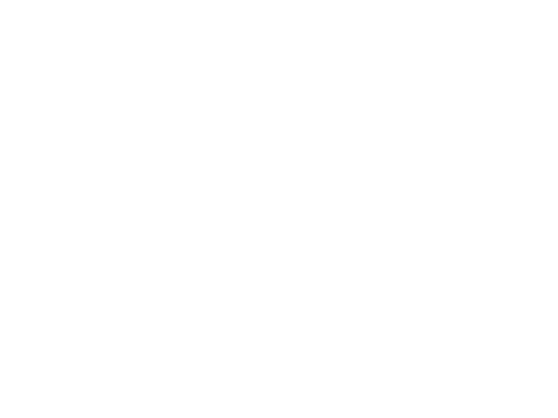

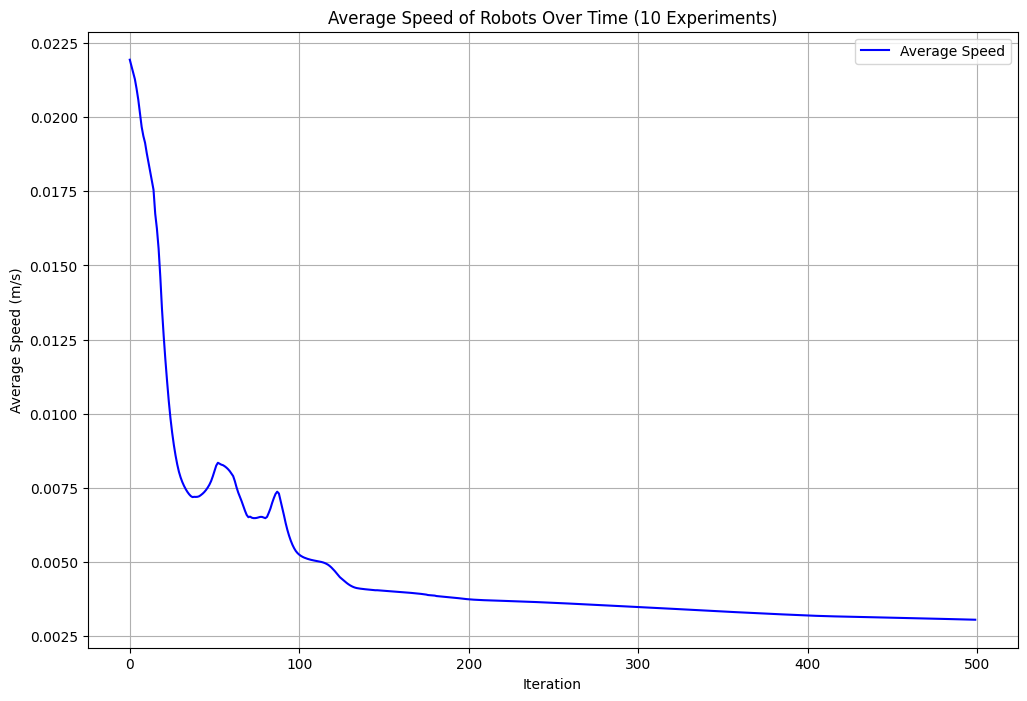

##### DEBUG OUTPUT #####
Your simulation will take approximately 1650 real seconds when deployed on the Robotarium. 

	 Simulation had 1196 iteration(s) where robots collided.

	 Simulation had 873 iteration(s) where the actuator limits of at least one robot were exceeded and thresholded to their maximum rotational velocity.


In [8]:
# Import necessary libraries
import rps.robotarium as robotarium
from rps.utilities.graph import *
from rps.utilities.transformations import *
from rps.utilities.barrier_certificates import *
from rps.utilities.misc import *
from rps.utilities.controllers import *

import numpy as np
import matplotlib.pyplot as plt  # Import for visualization

# =======================
# Simulation Parameters
# =======================

# Number of agents (N >= 5)
N = 12

# Number of iterations per experiment
iterations = 500

# Number of experiments to run
num_experiments = 100

# Initialize a variable to accumulate average speeds across experiments
average_speed_sum = np.zeros(iterations)

# =======================
# Define Colors for Plotting
# =======================

# =======================
# Initialize Robotarium Object
# =======================

# Instantiate Robotarium object
# Note: Depending on Robotarium's API, you might need to reset the robot positions between experiments
# Here, we assume that the robots can be reused without re-instantiation
r = robotarium.Robotarium(number_of_robots=N, show_figure=False, sim_in_real_time=False)

# Create barrier certificates to prevent collisions and boundary violations
si_barrier_cert = create_single_integrator_barrier_certificate_with_boundary()

# Create single-integrator to unicycle dynamics transformation functions
si_to_uni_dyn, uni_to_si_states = create_si_to_uni_mapping()

# Generate a connected graph Laplacian (for a cycle graph)
L = cycle_GL(N)
# Uncomment the following line if you want to use L squared in your control law
L = L @ L

# =======================
# Simulation Experiments
# =======================

for experiment in range(num_experiments):
    print(f"Starting Experiment {experiment + 1}/{num_experiments}")

    # Reset the simulation if necessary
    # Depending on Robotarium's API, you might need to reset robot positions here
    # For example:
    # initial_positions = initialize_positions(N)  # Define your initial positions function
    # for i in range(N):
    #     r.set_pose(i, initial_positions[:, i])

    # Initialize arrays to record positions and velocities for this experiment
    positions = np.zeros((2, N, iterations))      # To store positions: shape (2, N, iterations)
    velocities = np.zeros((2, N, iterations))     # To store velocities: shape (2, N, iterations)

    for k in range(iterations):

        # Get the current poses of the robots and convert to single-integrator poses
        x = r.get_poses()
        x_si = uni_to_si_states(x)

        # Record current positions
        positions[:, :, k] = x_si

        # Initialize the single-integrator control inputs
        si_velocities = np.zeros((2, N))

        # For each robot, compute the control input based on its neighbors
        for i in range(N):
            # Get the neighbors of robot 'i' from the graph Laplacian
            j = topological_neighbors(L, i)

            # Compute the consensus control: sum of relative positions to neighbors
            si_velocities[:, i] = np.sum(x_si[:, j] - x_si[:, i, None], axis=1)

        # Apply barrier certificates to ensure safety
        si_velocities = si_barrier_cert(si_velocities, x_si)

        # Transform single-integrator velocities to unicycle velocities
        dxu = si_to_uni_dyn(si_velocities, x)

        # Record the unicycle velocities
        velocities[:, :, k] = dxu

        # Set the velocities of all agents
        r.set_velocities(np.arange(N), dxu)

        # Advance the simulation
        r.step()

    # =======================
    # Compute Average Speed for This Experiment
    # =======================

    # Compute the speed (magnitude of velocity) for each agent over time
    speed = np.linalg.norm(velocities, axis=0)  # Shape: (N, iterations)

    # Compute the average speed over all agents for each iteration
    average_speed = np.mean(speed, axis=0)  # Shape: (iterations,)

    # Accumulate the average speed
    average_speed_sum += average_speed

    # Optional: Print progress
    print(f"Completed Experiment {experiment + 1}/{num_experiments}")

# =======================
# Compute Final Average Speed
# =======================

final_average_speed = average_speed_sum / num_experiments  # Shape: (iterations,)

# =======================
# Plot the Average Speed Over Time
# =======================

plt.figure(figsize=(12, 8))
plt.plot(final_average_speed, color='blue', label='Average Speed')

# Create custom legend entry
speed_legend = plt.Line2D([0], [0], color='blue', label='Average Speed')

plt.legend(handles=[speed_legend], loc='upper right')
plt.title('Average Speed of Robots Over Time (10 Experiments)')
plt.xlabel('Iteration')
plt.ylabel('Average Speed (m/s)')
plt.grid(True)
plt.show()

# =======================
# (Optional) Visualization of Trajectories from the Last Experiment
# =======================

# Uncomment the following block if you wish to visualize trajectories from the last experiment
'''
plt.figure(figsize=(10, 8))
for i in range(N):
    # Select a distinct color for each agent
    color = colors(i % 20)  # 'tab20' has 20 distinct colors
    # Plot trajectory
    plt.plot(positions[0, i, :], positions[1, i, :], color=color, label=f'Robot {i+1}')
    # Plot start position
    plt.plot(positions[0, i, 0], positions[1, i, 0], 'o', color=color, markersize=8, linestyle='None')
    # Plot end position
    plt.plot(positions[0, i, -1], positions[1, i, -1], 's', color=color, markersize=8, linestyle='None')

# Create custom legend entries
trajectory_legend = plt.Line2D([0], [0], color='black', label='Trajectories')
start_legend = plt.Line2D([0], [0], marker='o', color='w', label='Start Positions',
                          markerfacecolor='black', markersize=8, linestyle='None')
end_legend = plt.Line2D([0], [0], marker='s', color='w', label='End Positions',
                        markerfacecolor='black', markersize=8, linestyle='None')

plt.legend(handles=[trajectory_legend, start_legend, end_legend], loc='upper right')

plt.title('Trajectories of Robots (Consensus Algorithm) - Last Experiment')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.axis('equal')
plt.show()
'''

# =======================
# Terminate Robotarium Simulation
# =======================

# Call at end of script to print debug information and ensure proper termination
r.call_at_scripts_end()


### Experiment on $L$ for cycle graph with $N=12$: an average velocity of 0.005 m/s is measured at the 200-th iteration.

Starting Experiment 1/100
Completed Experiment 1/100
Starting Experiment 2/100
Completed Experiment 2/100
Starting Experiment 3/100
Completed Experiment 3/100
Starting Experiment 4/100
Completed Experiment 4/100
Starting Experiment 5/100
Completed Experiment 5/100
Starting Experiment 6/100
Completed Experiment 6/100
Starting Experiment 7/100
Completed Experiment 7/100
Starting Experiment 8/100
Completed Experiment 8/100
Starting Experiment 9/100
Completed Experiment 9/100
Starting Experiment 10/100
Completed Experiment 10/100
Starting Experiment 11/100
Completed Experiment 11/100
Starting Experiment 12/100
Completed Experiment 12/100
Starting Experiment 13/100
Completed Experiment 13/100
Starting Experiment 14/100
Completed Experiment 14/100
Starting Experiment 15/100
Completed Experiment 15/100
Starting Experiment 16/100
Completed Experiment 16/100
Starting Experiment 17/100
Completed Experiment 17/100
Starting Experiment 18/100
Completed Experiment 18/100
Starting Experiment 19/100
C

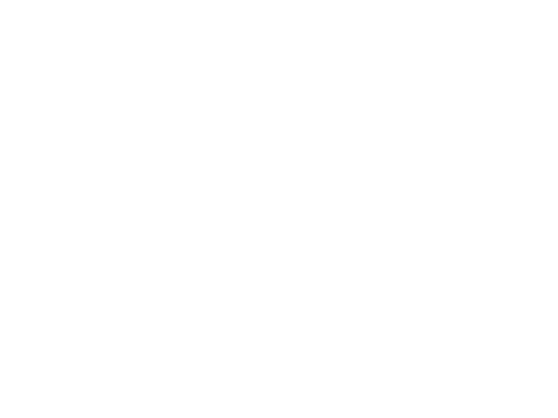

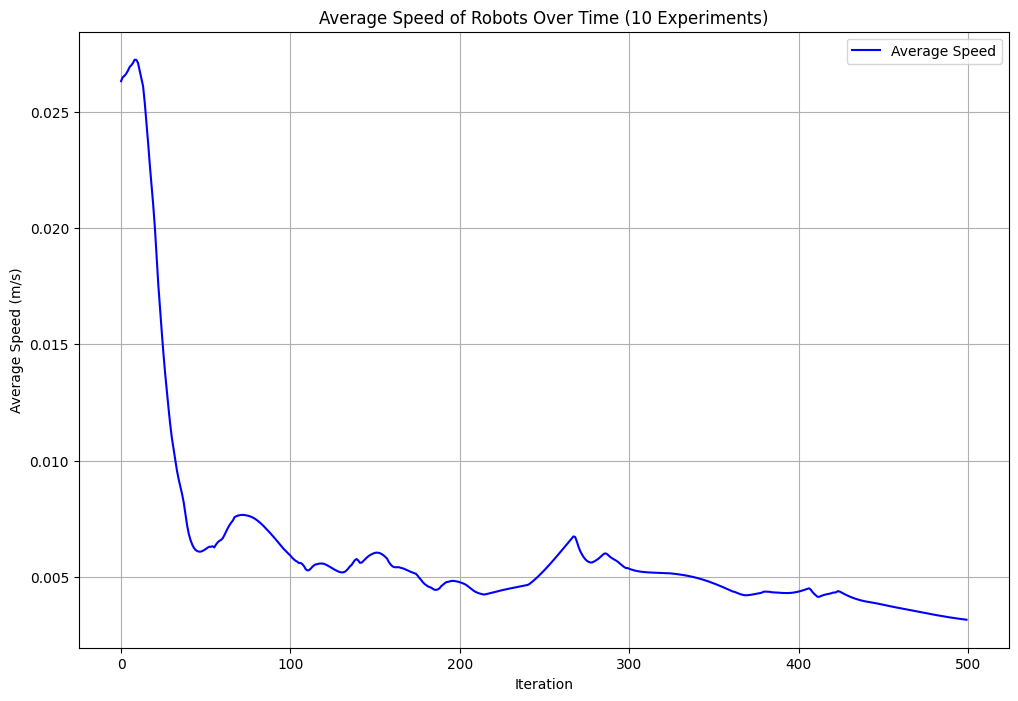

##### DEBUG OUTPUT #####
Your simulation will take approximately 1650 real seconds when deployed on the Robotarium. 

	 Simulation had 1196 iteration(s) where robots collided.

	 Simulation had 820 iteration(s) where the actuator limits of at least one robot were exceeded and thresholded to their maximum rotational velocity.


In [7]:
# Import necessary libraries
import rps.robotarium as robotarium
from rps.utilities.graph import *
from rps.utilities.transformations import *
from rps.utilities.barrier_certificates import *
from rps.utilities.misc import *
from rps.utilities.controllers import *

import numpy as np
import matplotlib.pyplot as plt  # Import for visualization

# =======================
# Simulation Parameters
# =======================

# Number of agents (N >= 5)
N = 12

# Number of iterations per experiment
iterations = 500

# Number of experiments to run
num_experiments = 100

# Initialize a variable to accumulate average speeds across experiments
average_speed_sum = np.zeros(iterations)

# =======================
# Define Colors for Plotting
# =======================

# =======================
# Initialize Robotarium Object
# =======================

# Instantiate Robotarium object
# Note: Depending on Robotarium's API, you might need to reset the robot positions between experiments
# Here, we assume that the robots can be reused without re-instantiation
r = robotarium.Robotarium(number_of_robots=N, show_figure=False, sim_in_real_time=False)

# Create barrier certificates to prevent collisions and boundary violations
si_barrier_cert = create_single_integrator_barrier_certificate_with_boundary()

# Create single-integrator to unicycle dynamics transformation functions
si_to_uni_dyn, uni_to_si_states = create_si_to_uni_mapping()

# Generate a connected graph Laplacian (for a cycle graph)
L = cycle_GL(N)
# Uncomment the following line if you want to use L squared in your control law
# L = L @ L

# =======================
# Simulation Experiments
# =======================

for experiment in range(num_experiments):
    print(f"Starting Experiment {experiment + 1}/{num_experiments}")

    # Reset the simulation if necessary
    # Depending on Robotarium's API, you might need to reset robot positions here
    # For example:
    # initial_positions = initialize_positions(N)  # Define your initial positions function
    # for i in range(N):
    #     r.set_pose(i, initial_positions[:, i])

    # Initialize arrays to record positions and velocities for this experiment
    positions = np.zeros((2, N, iterations))      # To store positions: shape (2, N, iterations)
    velocities = np.zeros((2, N, iterations))     # To store velocities: shape (2, N, iterations)

    for k in range(iterations):

        # Get the current poses of the robots and convert to single-integrator poses
        x = r.get_poses()
        x_si = uni_to_si_states(x)

        # Record current positions
        positions[:, :, k] = x_si

        # Initialize the single-integrator control inputs
        si_velocities = np.zeros((2, N))

        # For each robot, compute the control input based on its neighbors
        for i in range(N):
            # Get the neighbors of robot 'i' from the graph Laplacian
            j = topological_neighbors(L, i)

            # Compute the consensus control: sum of relative positions to neighbors
            si_velocities[:, i] = np.sum(x_si[:, j] - x_si[:, i, None], axis=1)

        # Apply barrier certificates to ensure safety
        si_velocities = si_barrier_cert(si_velocities, x_si)

        # Transform single-integrator velocities to unicycle velocities
        dxu = si_to_uni_dyn(si_velocities, x)

        # Record the unicycle velocities
        velocities[:, :, k] = dxu

        # Set the velocities of all agents
        r.set_velocities(np.arange(N), dxu)

        # Advance the simulation
        r.step()

    # =======================
    # Compute Average Speed for This Experiment
    # =======================

    # Compute the speed (magnitude of velocity) for each agent over time
    speed = np.linalg.norm(velocities, axis=0)  # Shape: (N, iterations)

    # Compute the average speed over all agents for each iteration
    average_speed = np.mean(speed, axis=0)  # Shape: (iterations,)

    # Accumulate the average speed
    average_speed_sum += average_speed

    # Optional: Print progress
    print(f"Completed Experiment {experiment + 1}/{num_experiments}")

# =======================
# Compute Final Average Speed
# =======================

final_average_speed = average_speed_sum / num_experiments  # Shape: (iterations,)

# =======================
# Plot the Average Speed Over Time
# =======================

plt.figure(figsize=(12, 8))
plt.plot(final_average_speed, color='blue', label='Average Speed')

# Create custom legend entry
speed_legend = plt.Line2D([0], [0], color='blue', label='Average Speed')

plt.legend(handles=[speed_legend], loc='upper right')
plt.title('Average Speed of Robots Over Time (10 Experiments)')
plt.xlabel('Iteration')
plt.ylabel('Average Speed (m/s)')
plt.grid(True)
plt.show()

# =======================
# (Optional) Visualization of Trajectories from the Last Experiment
# =======================

# Uncomment the following block if you wish to visualize trajectories from the last experiment
'''
plt.figure(figsize=(10, 8))
for i in range(N):
    # Select a distinct color for each agent
    color = colors(i % 20)  # 'tab20' has 20 distinct colors
    # Plot trajectory
    plt.plot(positions[0, i, :], positions[1, i, :], color=color, label=f'Robot {i+1}')
    # Plot start position
    plt.plot(positions[0, i, 0], positions[1, i, 0], 'o', color=color, markersize=8, linestyle='None')
    # Plot end position
    plt.plot(positions[0, i, -1], positions[1, i, -1], 's', color=color, markersize=8, linestyle='None')

# Create custom legend entries
trajectory_legend = plt.Line2D([0], [0], color='black', label='Trajectories')
start_legend = plt.Line2D([0], [0], marker='o', color='w', label='Start Positions',
                          markerfacecolor='black', markersize=8, linestyle='None')
end_legend = plt.Line2D([0], [0], marker='s', color='w', label='End Positions',
                        markerfacecolor='black', markersize=8, linestyle='None')

plt.legend(handles=[trajectory_legend, start_legend, end_legend], loc='upper right')

plt.title('Trajectories of Robots (Consensus Algorithm) - Last Experiment')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.axis('equal')
plt.show()
'''

# =======================
# Terminate Robotarium Simulation
# =======================

# Call at end of script to print debug information and ensure proper termination
r.call_at_scripts_end()


### Observation and conclusion
Although there is positive values in non-diagonal elements, we can still see that $L^2$ converge faster than $L$. This is because the convergence rate is dominated by the algebraic connectivity. For a cycle graph with $N=12$, applying $L^2$ could still increase the convergence rate since $\lambda_2 > 1$ and hence, $\lambda_2^2 > \lambda_2$